# ANNOTATION PIPELINE

The purpose of this notebook is to show the way the images we get from blender are processed in order to fit the MS-COCO format.

In [4]:
import cv2
import numpy as np
import os
import re
import skimage
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import datetime


In [5]:
ROOT_DIR = os.path.abspath('..')
image_folder_path = os.path.join(ROOT_DIR,'data/raw/Dataset_v3/bottle/val')
masks_folder_path = os.path.join(ROOT_DIR,'data/raw/Dataset_v3/masks/val')

In [6]:
print(masks_folder_path)

/Users/p099947-dev/PycharmProjects/Vision/Vision/data/raw/Dataset_v3/masks/val


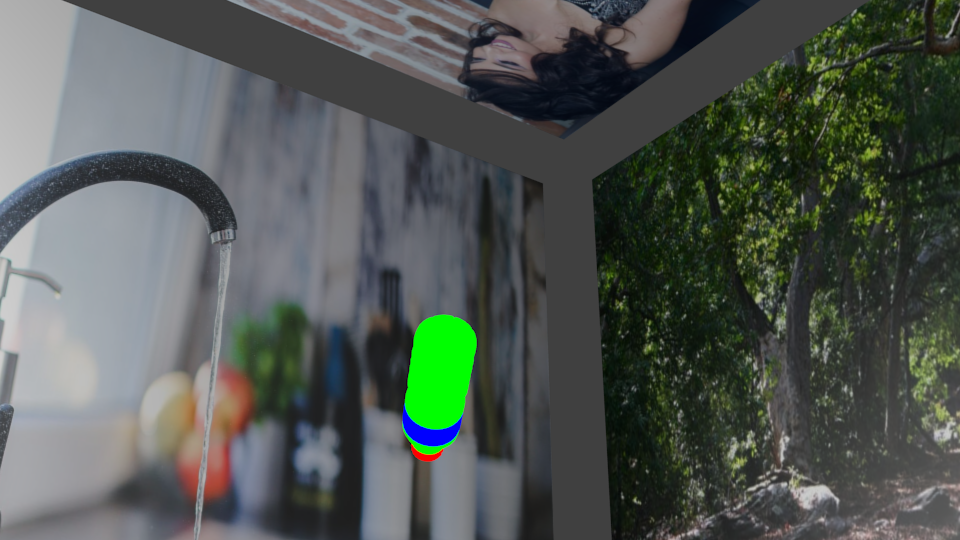

In [7]:
file_names = next(os.walk(masks_folder_path))[2]
file_name = random.choice(file_names)
#file_name = "0579.png" 
file = os.path.join(masks_folder_path,file_name)

image = cv2.imread(os.path.join(masks_folder_path,file_name))
cv2.imwrite('Images/0001.png',image)
Image.open(file)

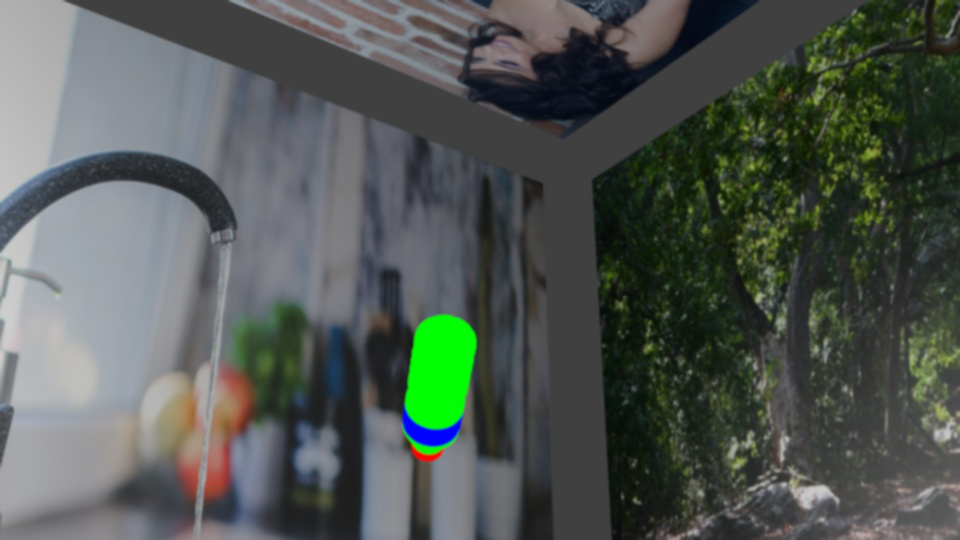

In [8]:
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

cv2.imwrite('Images/blurred.jpg',blurred_image)
Image.open('Images/blurred.jpg')

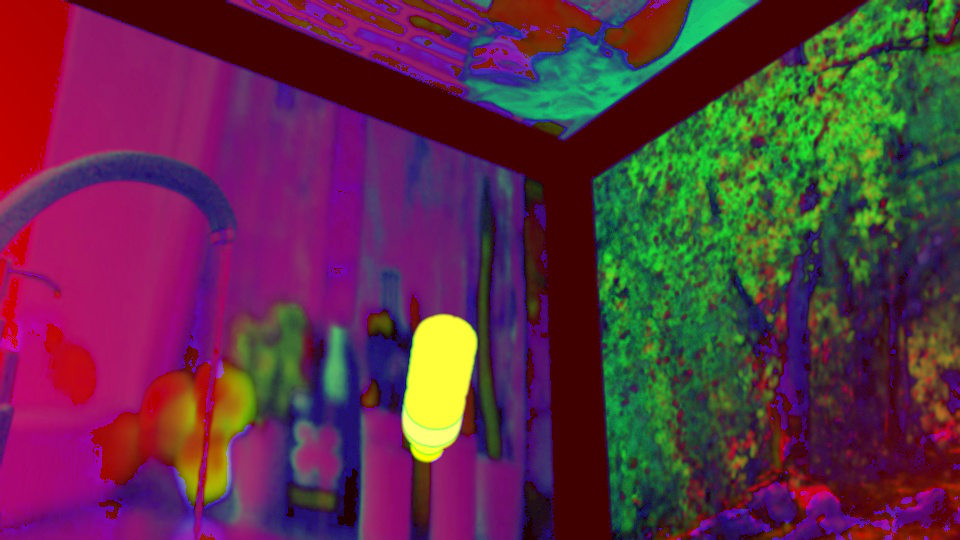

In [9]:
hsv_image = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2HSV)

cv2.imwrite('Images/hsv.jpg',hsv_image) # Because, if we don't save it in a file, the colors are shown in an RGB fashion 
Image.open('Images/hsv.jpg')

In [19]:
# couvercle
lower_couv = np.array([0, 100, 100])
upper_couv = np.array([0, 255, 255])

# bouteille :
lower_bott = np.array([60, 100, 255])
upper_bott = np.array([60, 255, 255])

# etiquette :
lower_etiq = np.array([120, 100, 100])
upper_etiq = np.array([120, 255, 255])

# Mask obtention + Mask processing
mask_couv = cv2.inRange(hsv_image, lower_couv, upper_couv)
mask_couv = cv2.morphologyEx(mask_couv, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)))
mask_couv = cv2.morphologyEx(mask_couv, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)))


mask_bott = cv2.inRange(hsv_image, lower_bott, upper_bott)
mask_bott = cv2.morphologyEx(mask_bott, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)))
mask_bott = cv2.morphologyEx(mask_bott, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)))


mask_etiq = cv2.inRange(hsv_image, lower_etiq, upper_etiq)
mask_etiq = cv2.morphologyEx(mask_etiq, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)))
mask_etiq = cv2.morphologyEx(mask_etiq, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)))



mask_tot = mask_bott +mask_couv+ mask_etiq

# Binary mask saving
cv2.imwrite('Masks/0001_cap.png',mask_couv)
cv2.imwrite('Masks/0001_bottle.png',mask_bott)
cv2.imwrite('Masks/0001_label.png',mask_etiq)

True

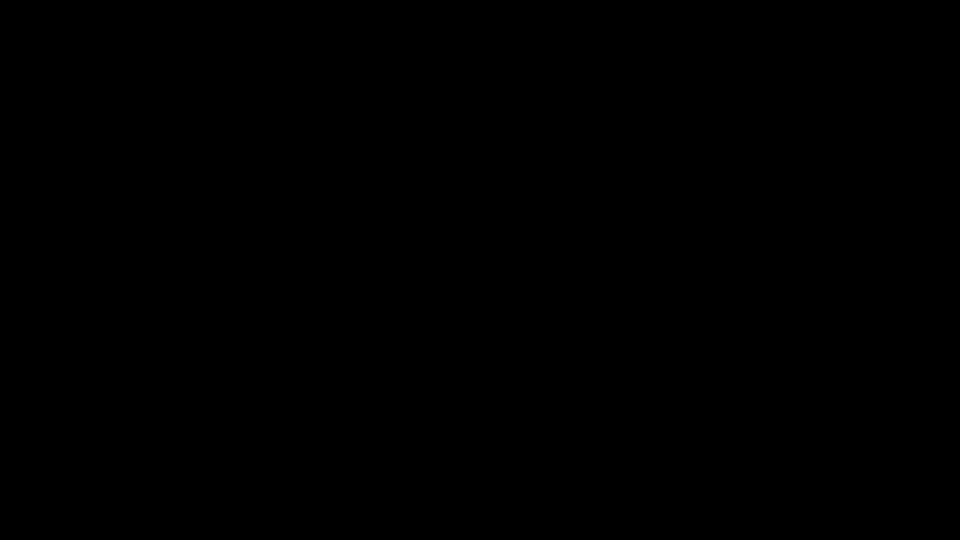

In [20]:
Image.fromarray(mask_couv)

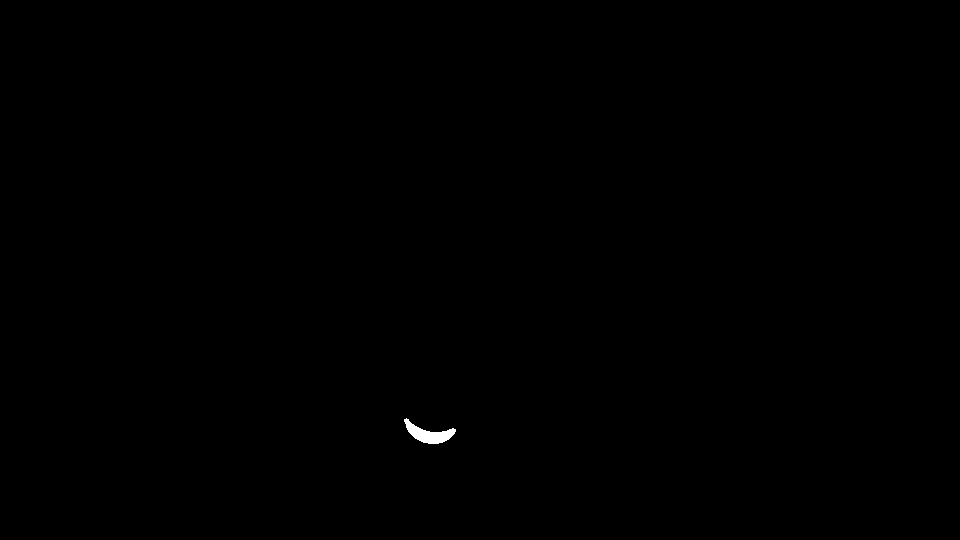

In [21]:
Image.fromarray(mask_etiq)

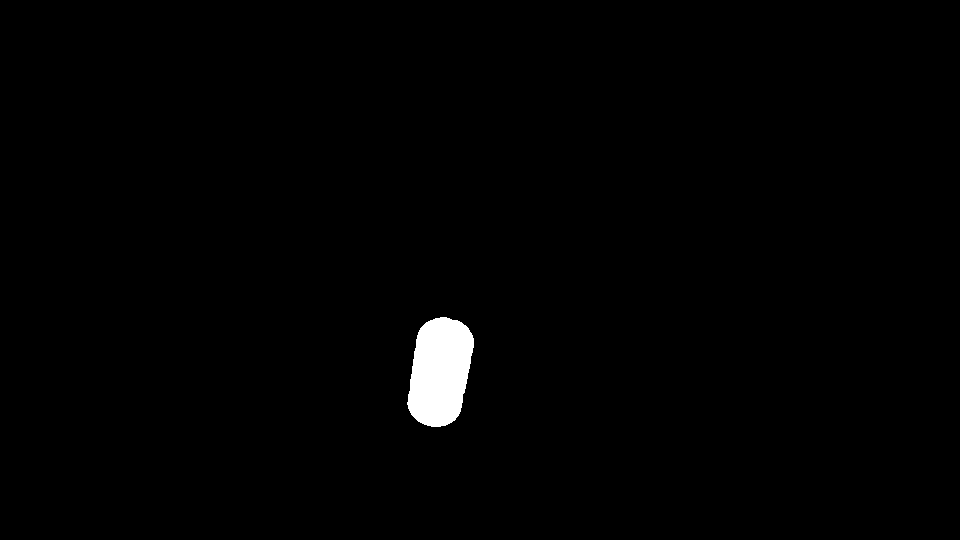

In [22]:
Image.fromarray(mask_bott)

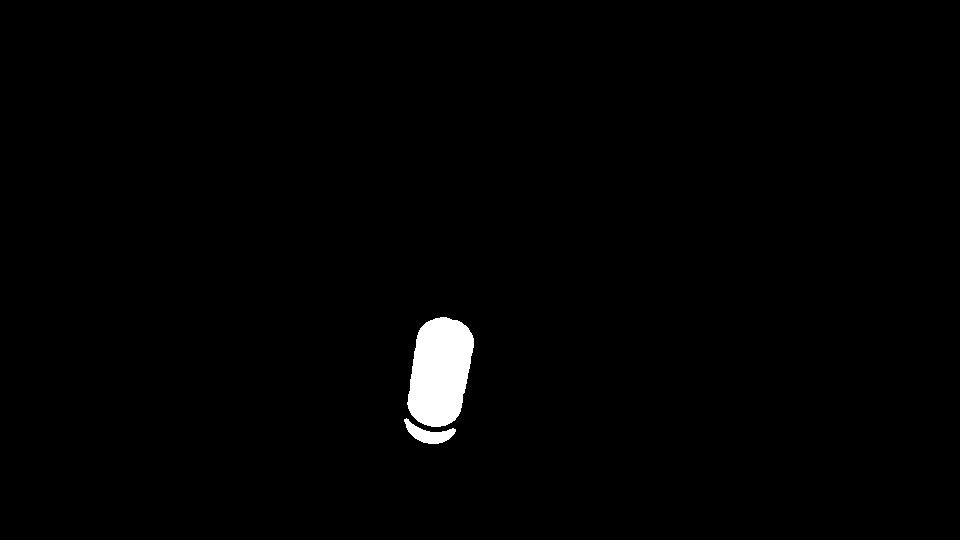

In [23]:
Image.fromarray(mask_tot)

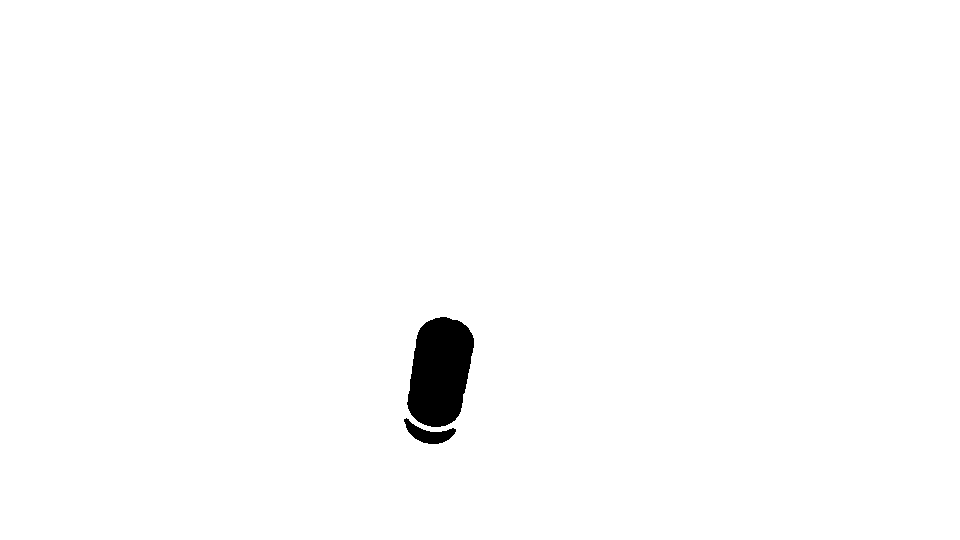

In [15]:
mask_bg = 255 - mask_tot
Image.fromarray(mask_bg)

## Annotation part 

In [16]:
import sys
import fnmatch
import json

sys.path.append('/Users/p099947-dev/PycharmProjects/Vision/')
from pycococreator.pycococreatortools import pycococreatortools

In [17]:
!python3 water-bottle_to_coco_json.py

/Users/p099947-dev/Desktop/Master2RD/Trained_Bottle/Vision_vm_trained/notebooks/Masks/0001_cap.png
/Users/p099947-dev/Desktop/Master2RD/Trained_Bottle/Vision_vm_trained/notebooks/Masks/0001_bottle.png
/Users/p099947-dev/Desktop/Master2RD/Trained_Bottle/Vision_vm_trained/notebooks/Masks/0001_label.png


In [18]:
!cat file.json

{"info": {"description": "Water Bottle Dataset", "url": "https://github.com/bybysker/pycococreator", "version": "0.1.0", "year": 2019, "contributor": "bybysker", "date_created": "2019-07-23 12:12:51.901714"}, "licenses": [{"id": 1, "name": "Attribution-NonCommercial-ShareAlike License", "url": "http://creativecommons.org/licenses/by-nc-sa/2.0/"}], "categories": [{"id": 1, "name": "cap", "supercategory": "water_bottle"}, {"id": 2, "name": "bottle", "supercategory": "water_bottle"}, {"id": 3, "name": "label", "supercategory": "water_bottle"}], "images": [{"id": 1, "file_name": "hsv.jpg", "width": 960, "height": 540, "date_captured": "2019-07-23 12:12:51.901669", "license": 1, "coco_url": "", "flickr_url": ""}, {"id": 2, "file_name": "0001.png", "width": 960, "height": 540, "date_captured": "2019-07-23 12:12:51.901669", "license": 1, "coco_url": "", "flickr_url": ""}, {"id": 3, "file_name": "blurred.jpg", "width": 960, "height": 540, "date_captured": "2019-07-23 12:12:51.901669", "license